In [2]:
%pip install -U scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install patchify 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip show wandb

Name: wandb
Version: 0.19.4
Summary: A CLI and library for interacting with the Weights & Biases API.
Home-page: 
Author: 
Author-email: Weights & Biases <support@wandb.com>
License: MIT License

Copyright (c) 2021 Weights and Biases, Inc.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEM

In [7]:
%pip install wandb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import wandb as login

In [9]:
%env WANDB_API_KEY=$2d0c2647de64a179fa79c6f5af658e429ac6423c

env: WANDB_API_KEY=$2d0c2647de64a179fa79c6f5af658e429ac6423c


In [10]:
#%wandb login  already login as iamaastha87 so needed to relogin     

In [11]:
import wandb

wandb.login(relogin=True)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\HP\_netrc


True

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random

In [13]:
minmaxscaler = MinMaxScaler()

In [14]:
path = r"D:/projects/objectdetection/Semantic segmentation dataset"
print(os.listdir(path))


['classes.json', 'Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Tile 6', 'Tile 7', 'Tile 8']


In [15]:
dataset_root_folder = 'D:/projects/objectdetection/'

In [16]:
dataset_name = 'Semantic segmentation dataset'

In [17]:
images = []
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(path)
    #print(images)
  # if dir_name == 'masks':
  #   masks = os.listdir(path)
  #   print(masks)
  for i, image_name in enumerate(images):
    if (image_name.endswith('.jpg')):
      #print(image_name)
       a = True


D:/projects/objectdetection/Semantic segmentation dataset
Tile 1
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 1\images
masks
Tile 2
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 2\images
masks
Tile 3
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 3\images
masks
Tile 4
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 4\images
masks
Tile 5
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 5\images
masks
Tile 6
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 6\images
masks
Tile 7
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 7\images
masks
Tile 8
images
D:/projects/objectdetection/Semantic segmentation dataset\Tile 8\images
masks


In [18]:
image_patch_size = 256

In [19]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [20]:
image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]

In [21]:
image.shape

(544, 509, 3)

In [22]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)


In [23]:
len(image_patches)

2

In [24]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [25]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
#image_data = image_patches[0, 0, :, :]

image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [26]:
image_y[0].shape

(256, 256, 3)

In [27]:
print(type(image))

<class 'numpy.ndarray'>


In [28]:
type(Image.fromarray(image))

PIL.Image.Image

In [29]:
image.shape

(544, 509, 3)

In [30]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [31]:
image_dataset=[]
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [32]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [33]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


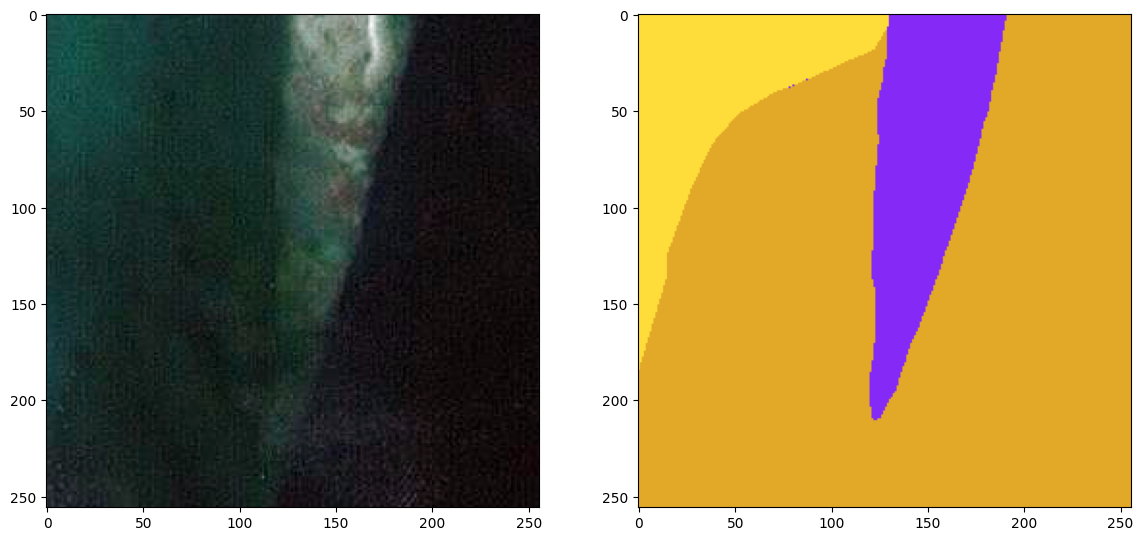

In [34]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [35]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [36]:
label = individual_patched_mask
     

In [37]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [38]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)
     

In [39]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [41]:
print("Total unique labels based on masks: ",format(np.unique(labels)))


Total unique labels based on masks:  [0 1 2 3 4 5]


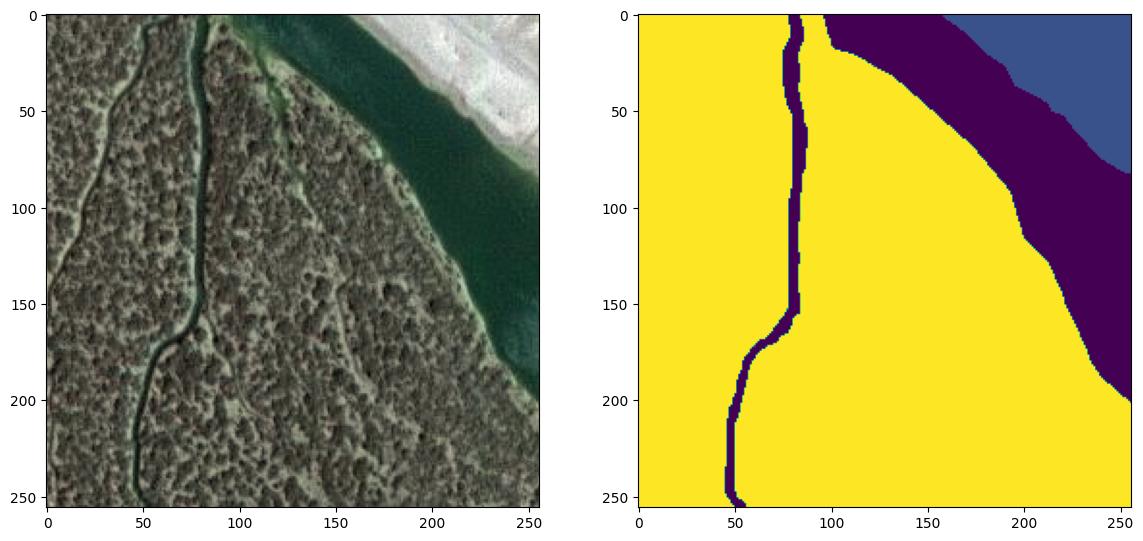

In [42]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [43]:
total_classes = len(np.unique(labels))

In [44]:
total_classes


6

In [45]:
from tensorflow import keras 

In [46]:
from tensorflow.keras.utils import to_categorical # type: ignore

In [47]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [48]:
master_trianing_dataset = image_dataset


In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [52]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]


In [53]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [54]:
#DEEP LEARNING ALGORITHM 

In [55]:
%pip install -U segmentation-models


  Using cached efficientnet-1.0.0-py3-none-any.whl.metadata (6.1 kB)
Using cached efficientnet-1.0.0-py3-none-any.whl (17 kB)
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [57]:

from keras import backend as K

In [58]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [59]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [60]:
metrics = ["accuracy", jaccard_coef]


In [61]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [62]:

def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [63]:
model = get_deep_learning_model()

In [64]:
#generation loss function 
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]


In [65]:
%pip install keras_utils


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
%pip install generic_utils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
%pip install -U efficientnet==1.1.1 

  Using cached efficientnet-1.1.1-py3-none-any.whl.metadata (6.4 kB)
Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import efficientnet
print(efficientnet.__version__)


1.1.1


In [69]:
import segmentation_models as sm 

Segmentation Models: using `keras` framework.


In [70]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)


In [71]:
focal_loss = sm.losses.CategoricalFocalLoss()
     

In [72]:
total_loss = dice_loss + (1 * focal_loss)


In [73]:
####MODEL COMPILATION
import tensorflow as tf


In [74]:
tf.keras.backend.clear_session()


In [75]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [76]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [77]:

import keras
from IPython.display import clear_output

%matplotlib inline

In [78]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1
    
    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show()

plot_loss = PlotLoss()

In [79]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)
    
    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show()

plot_loss = PlotLossEx()

In [80]:
%pip install wandb -upgrade

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Python311\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Python311\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Python311\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Python311\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Python311\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [81]:


from wandb.integration.keras import WandbCallback



#import wandb
#wandb.init(project="satellite-segmentation-dubai-images,entity="iamaastha87-ldrp-institute-of-technology-and-research-ga-org")

In [ ]:

model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          shuffle=False)

NameError: name 'model' is not defined

In [83]:
history_a = model_history

In [84]:
history_a.history


{'loss': [1.0006682872772217,
  0.9801463484764099,
  0.9590768814086914,
  0.9522383809089661,
  0.9498415589332581,
  0.9470759034156799,
  0.9438996315002441,
  0.9395224452018738,
  0.9346713423728943,
  0.9302800893783569],
 'accuracy': [0.542181670665741,
  0.6589691638946533,
  0.7330617904663086,
  0.7474778890609741,
  0.7509045600891113,
  0.759984016418457,
  0.7708786129951477,
  0.7851085066795349,
  0.7987126111984253,
  0.8097123503684998],
 'jaccard_coef': [0.26189228892326355,
  0.37713828682899475,
  0.4760254919528961,
  0.5066254138946533,
  0.5110602974891663,
  0.526584804058075,
  0.5467694997787476,
  0.5761305689811707,
  0.5972789525985718,
  0.6158022880554199],
 'val_loss': [0.9919338226318359,
  0.9660528302192688,
  0.9685882925987244,
  0.9757591485977173,
  0.9806193113327026,
  0.9882137775421143,
  0.9786918759346008,
  0.9624707698822021,
  0.964690089225769,
  0.9582931995391846],
 'val_accuracy': [0.6131227612495422,
  0.7016735076904297,
  0.709430

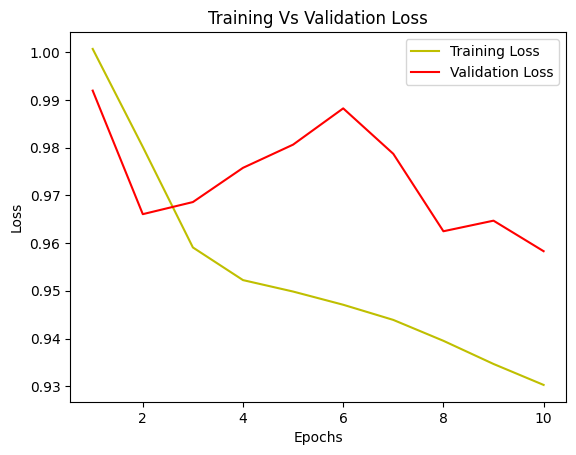

In [85]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

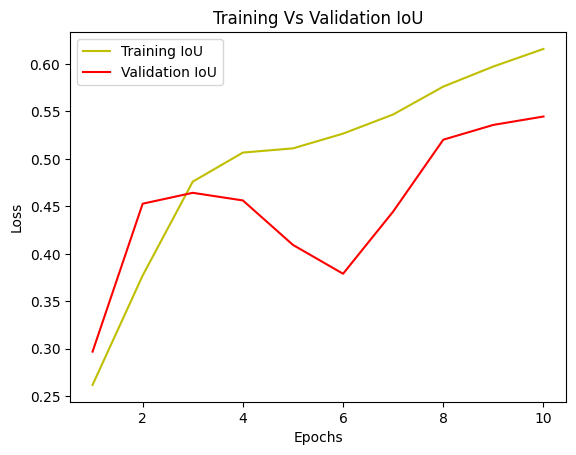

In [86]:

jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [87]:
model_history.params


{'verbose': 1, 'epochs': 10, 'steps': 51}

In [88]:
y_pred = model.predict(X_test)


5/5 [==============================] - 6s 956ms/step


In [89]:
len(y_pred)


142

In [90]:
y_pred


array([[[[5.23749702e-02, 4.23371941e-01, 2.42160663e-01,
          1.23722956e-01, 1.17945485e-01, 4.04239856e-02],
         [2.75535602e-02, 5.08252203e-01, 2.18084633e-01,
          9.67373773e-02, 1.18789531e-01, 3.05826627e-02],
         [2.69062947e-02, 5.15050232e-01, 2.22100988e-01,
          8.83546621e-02, 1.13382302e-01, 3.42054702e-02],
         ...,
         [1.04714431e-01, 2.67619342e-01, 1.74559608e-01,
          2.81535573e-02, 4.12542671e-01, 1.24104936e-02],
         [1.23693720e-01, 2.54853368e-01, 1.58118084e-01,
          4.38473225e-02, 4.03615683e-01, 1.58718098e-02],
         [2.04222128e-01, 2.26497769e-01, 1.78302944e-01,
          6.53237998e-02, 2.82751799e-01, 4.29015867e-02]],

        [[2.60290410e-02, 4.80403721e-01, 2.64805317e-01,
          1.15178309e-01, 7.31833503e-02, 4.04002592e-02],
         [8.13083351e-03, 6.63192630e-01, 1.80726290e-01,
          7.04539269e-02, 6.11912496e-02, 1.63051765e-02],
         [9.53037478e-03, 6.59718692e-01, 2.0051

In [91]:
y_pred_argmax = np.argmax(y_pred, axis=3)


In [92]:
len(y_pred_argmax)


142

In [93]:
y_pred_argmax


array([[[1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [4, 0, 0, ..., 1, 1, 1],
        [4, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 0],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2]],

       ...,

       [[1, 2, 2, ..., 1, 1, 1],
        [1, 1, 2, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [94]:
y_test_argmax = np.argmax(y_test, axis=3)


In [95]:
y_test_argmax


array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [96]:
import random

In [97]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 272ms/step


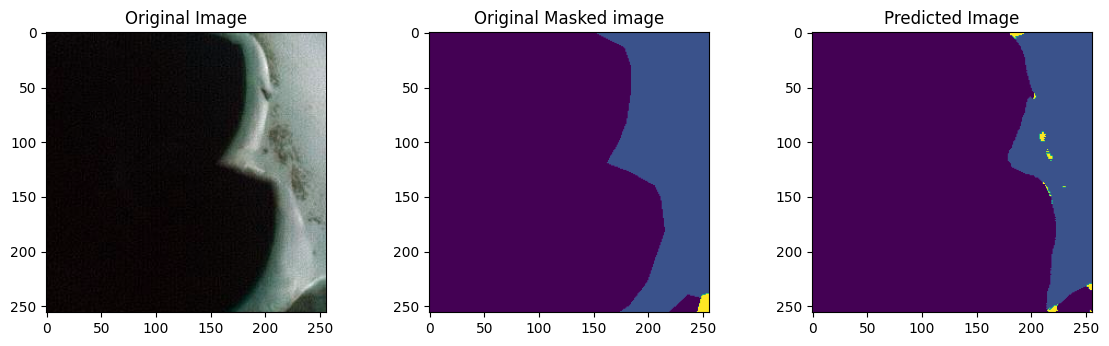

In [98]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [1]:
model.save("satellite_segmentation_full.h5")

NameError: name 'model' is not defined

In [100]:
%ls -lah 


 Volume in drive D is New Volume

File Not Found



 Volume Serial Number is C0C8-84E5

 Directory of d:\projects\objectdetection



In [2]:
import os

# Get current working directory
current_path = os.getcwd()
print("Current working directory:", current_path)

# Get full path of your saved model
model_path = os.path.abspath("satellite_segmentation_full.h5")
print("Full model path:", model_path)

Current working directory: d:\projects\objectdetection
Full model path: d:\projects\objectdetection\satellite_segmentation_full.h5


In [3]:
from keras.models import load_model 

In [4]:
saved_model = load_model('d:\projects\objectdetection\satellite_segmentation_full.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss, 
                                          'jaccard_coef': jaccard_coef}))
     

NameError: name 'total_loss' is not defined

In [5]:
model.loss.name


NameError: name 'model' is not defined

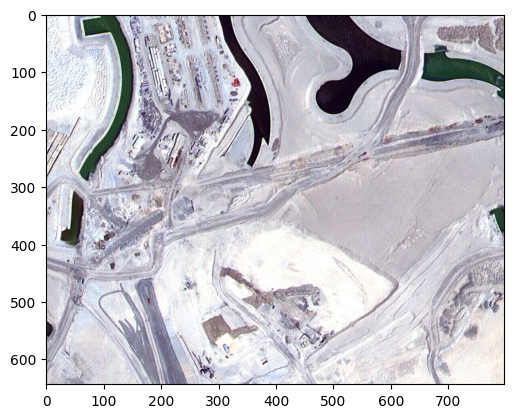

In [127]:
plt.imshow(Image.open('D:\projects\objectdetection\Semantic segmentation dataset\Tile 1\images\image_part_001.jpg'))


In [128]:
image = Image.open('D:\projects\objectdetection\Semantic segmentation dataset\Tile 1\images\image_part_001.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [129]:
prediction = saved_model.predict(image)


1/1 [==============================] - 0s 258ms/step


In [130]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

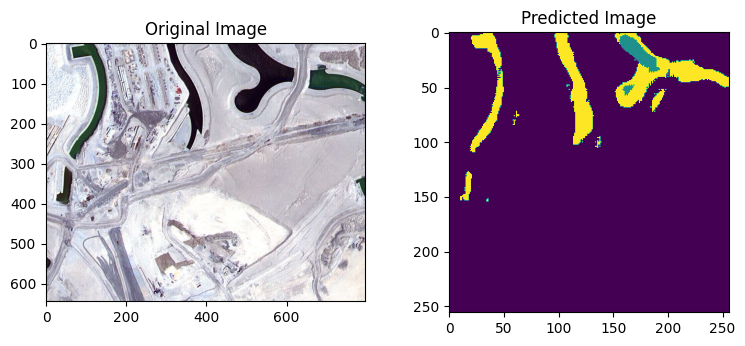

In [131]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('D:\projects\objectdetection\Semantic segmentation dataset\Tile 1\images\image_part_001.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)